In [1]:
%autosave 0

Autosave disabled


In [21]:
## 1.ベルルーイ試行作成
# 指定した整数の逆数で成功
import random

def bernoulli(_l):
    result = random.randint(1,_l)
    if result == 1:        
        return True
    else:
        return False

In [22]:
## 2.ベルヌーイ試行をm回繰り返して成功の数を返す
def repeat_bernulli(_l,_m):
    results = []
    success_num = 0
    for i in range(1,_m):
        result = bernoulli(_l)
        results.append(result)
        if result == True:success_num +=1
    #print("成功回数は" , success_num, "回です。")
    return success_num
    #print(results)


In [65]:
## 3.2で作成したメソッドをm回試行して二項分布を作成する
def binomial_hist_gen(_l,_m,_n):
    trial_result = []
    for i in range(0,_n):
        trial_result.append(repeat_bernulli(_l,_m))
    #return trial_result
    from scipy.stats import norm

    u,sigma = norm.fit(trial_result)
    print('平均回数は',u,'でした。')
    print('分散は',sigma,'でした。')

    ## 6 ヒストと正規分布のフィッティング結果を比較する


    # ヒストグラムの左右の端を指定
    from math import ceil,floor    #left_edge  = u - 5 * sigma
    sigma_range = 4
    left_edge  = floor(u - sigma_range * sigma)
    right_edge = ceil(u + sigma_range * sigma)
    
    # ビン数指定
    bins = right_edge - left_edge + 1 
    
    # 正規分布でフィッティングして結果を表示 & 保存
    x = np.linspace(left_edge,right_edge,num=_m)
    pdf_fitted =  _n * norm.pdf(x,loc=u,scale=sigma)
    plt.figure
    plt.title('Binomial Hist L={} M={} N ={} '.format(_l,_m,_n))
    plt.plot(x,pdf_fitted,'r-' )
    plt.hist(trial_result,bins=bins,range=(left_edge,right_edge))#,normed=1)
    plt.savefig(r'hist_images\binomial_hist_l{}_m{}_n{}.jpg'.format(_l,_m,_n))
    plt.show()
    

平均回数は 0.90096 でした。
分散は 0.8961311725411633 でした。


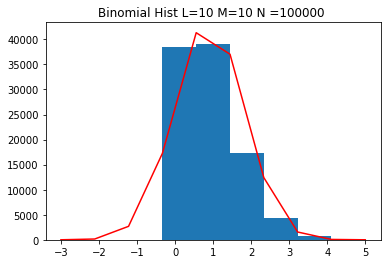

In [70]:
## 4. ヒストグラム作成
trial_result = binomial_hist_gen(10     # ベルヌーイの成功率
                                 ,10   # ベルヌーイ試行数
                                 ,100000  #  プロット数
                                )

平均回数は 4.89391 でした。
分散は 2.1004225555587617 でした。


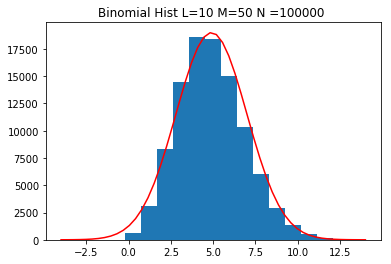

In [71]:
## 4. ヒストグラム作成
trial_result = binomial_hist_gen(10     # ベルヌーイの成功率
                                 ,50    # ベルヌーイ試行数
                                 ,100000  #  プロット数
                                )

平均回数は 99.90909 でした。
分散は 9.492734346430433 でした。


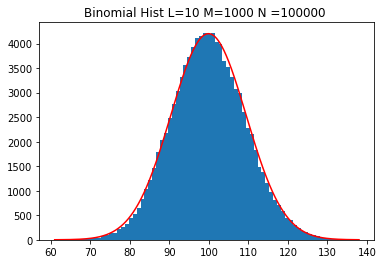

In [72]:
trial_result = binomial_hist_gen(10     # ベルヌーイの成功率
                                 ,1000    # ベルヌーイ試行数
                                 ,100000  #  プロット数
                                )